In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sb
sb.set_style("white")

# Lest do the trapz rule in a C way

In [2]:
def trapz_rule(fun,a,b,N):
    delta = (b - a) / (N-1.0)
    limits = np.linspace(a,b,N)
    
    count = 0.0
    for i in range(1,N-1):
        count += fun(limits[i])
    
    integral = fun(limits[0]) + 2.0*count + fun(limits[-1])
    return (delta/2.0) * integral

# The python way

In [3]:
def trapz_py(fun,limits):
    delta = (limits[-1]-limits[0])/(len(limits)-1.0)
    
    count = 2.0 * np.sum(fun(limits[1:-1]))
    integral = fun(limits[0]) + count + fun(limits[-1])
    
    return (delta/2.0) * integral

In [4]:
kernel = lambda x: np.cos(x)**2

In [5]:
x = np.linspace(0.0,np.pi/2.0,11)

In [6]:
inte_c = trapz_rule(kernel,0.0,np.pi/2.0,11)
print inte_c

0.7853981633974484


In [7]:
inte_p = trapz_py(kernel,x)
print inte_p

0.7853981633974483


In [8]:
inte_py = np.trapz(kernel(x),x)
print inte_py

0.7853981633974483


# Lets calculate some means
first let me show you a fast way to load multiple files

here's the link for the data :https://drive.google.com/drive/folders/1aNqqGCEBHvqwE3PdumOQVceiK-t6O-JD?usp=sharing

In [9]:
from glob import glob

In [10]:
data_buffer = glob('data_mean/data_*.dat')

In [11]:
print data_buffer

['data_mean/data_0.dat', 'data_mean/data_1.dat', 'data_mean/data_2.dat', 'data_mean/data_3.dat', 'data_mean/data_4.dat', 'data_mean/data_5.dat', 'data_mean/data_6.dat', 'data_mean/data_7.dat', 'data_mean/data_8.dat']


In [12]:
data_cont = [np.loadtxt(d) for d in data_buffer]

In [13]:
print np.shape(data_cont)

(9, 100)


In [14]:
r = np.linspace(0,500,100)

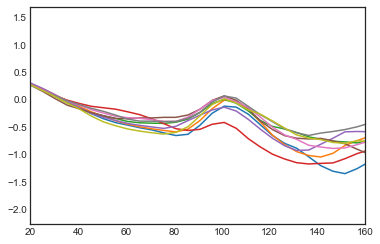

In [15]:
for i in range(len(data_cont)):
    plt.plot(r,data_cont[i]*pow(r,2));
plt.xlim(20,160);

In [16]:
data_array = np.array(data_cont).T

with all the possible loops

In [17]:
means = np.zeros(len(data_array))
for i in range(len(data_array)):
    count = 0.0
    for j in range(len(data_array.T)):
        count += data_array[i][j]
    means[i] = count/len(data_array.T)

one less loop

In [18]:
means_v2 = np.zeros(len(data_array))
for i in range(len(data_array)):
    means_v2[i] = np.sum(data_array[i]) / len(data_array.T)

without loops

In [19]:
mean_py = np.sum(data_array,axis=-1) / len(data_array.T)

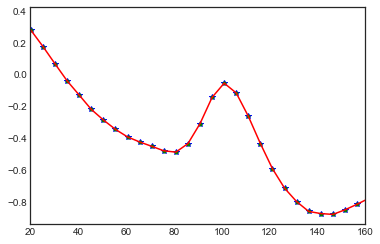

In [20]:
plt.plot(r,means_v2*pow(r,2),'*b');
plt.plot(r,mean_py*pow(r,2),'.g');
plt.plot(r,means*pow(r,2),'r');
plt.xlim(20,160);

# Calculate the $\sigma^2$